In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import fetch_openml
import sklearn.neighbors
import sklearn.svm
import sklearn.model_selection
import sklearn.neural_network
import sklearn.ensemble

In [2]:
mnist = fetch_openml("mnist_784")
mnist.data.shape

(70000, 784)

In [3]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Establish Baseline Performance using Supervised Learning

In [6]:
# 80/20 train test split using the first 10000 data (full dataset is too slow)
mnist_data_train, mnist_data_test = sklearn.model_selection.train_test_split(mnist.data.iloc[0:10000], 
                                                                                test_size=0.2, random_state = 0)
mnist_label_train, mnist_label_test = sklearn.model_selection.train_test_split(mnist.target.iloc[0:10000], 
                                                                               test_size = 0.2, random_state=0)

In [7]:
svc = sklearn.svm.SVC() # use parameters in LeCun study
svc_params = {'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf']} # gaussian kernel
svc_poly_params = {'C': [0.01, 0.1, 1, 10], 'kernel': ['poly'], 'degree': [4]}

In [8]:
gridSearchSVC = sklearn.model_selection.GridSearchCV(svc, [svc_params, svc_poly_params], n_jobs = -1, verbose=2)
gridSearchSVC.fit(mnist_data_train, mnist_label_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10], 'degree': [4],
                          'kernel': ['poly']}],
             verbose=2)

In [12]:
gridSearchSVC.best_score_, gridSearchSVC.best_params_

(0.9623750000000001, {'C': 10, 'kernel': 'rbf'})

In [14]:
svc = sklearn.svm.SVC(C=10, kernel='rbf')
svc.fit(mnist_data_train, mnist_label_train)

SVC(C=10)

In [16]:
# test accuracy for SVM 
svc.score(mnist_data_test, mnist_label_test)

0.9675

[CV] END .................................C=0.01, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=  29.3s
[CV] END .........................C=1, degree=4, kernel=poly; total time=  16.4s
[CV] END .................................C=0.01, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=  29.8s
[CV] END .........................C=1, degree=4, kernel=poly; total time=  16.1s
[CV] END .................................C=0.01, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=  29.6s
[CV] END .........................C=1, degree=4, kernel=poly; total time=  16.4s
[CV] END .................................C=0.01, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=  29.5s
[CV] END .........................C=1, degree=4, kernel=poly; total time=  16.6s
[CV] END ...................

In [22]:
mlp = sklearn.neural_network.MLPClassifier()
# parameters used in LeCun study
mlp_params = [{'hidden_layer_sizes': [(300, ), (100, ), (1000,), (300, 100), (500, 150)]}]

In [25]:
gridSearchMLP = sklearn.model_selection.GridSearchCV(mlp, param_grid=mlp_params, n_jobs = -1, verbose = 2, refit=True)
gridSearchMLP.fit(mnist_data_train, mnist_label_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ..........................hidden_layer_sizes=(100,); total time=   4.3s
[CV] END .........................hidden_layer_sizes=(1000,); total time=  21.1s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   5.6s
[CV] END .........................hidden_layer_sizes=(1000,); total time=  23.3s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   4.7s
[CV] END .........................hidden_layer_sizes=(1000,); total time=  24.4s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   5.4s
[CV] END .........................hidden_layer_sizes=(1000,); total time=  29.4s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   7.0s
[CV] END .........................hidden_layer_sizes=(1000,); total time=  30.3s


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'hidden_layer_sizes': [(300,), (100,), (1000,),
                                                 (300, 100), (500, 150)]}],
             verbose=2)

In [194]:
gridSearchMLP.best_score_

0.9375

In [26]:
gridSearchMLP.best_estimator_.score(mnist_data_test, mnist_label_test)

0.951

In [27]:
randomForest = sklearn.ensemble.RandomForestClassifier()
randomForest.fit(mnist_data_train, mnist_label_train)
randomForest.score(mnist_data_test, mnist_label_test)

0.9435

In [195]:
randomForest.score(mnist_data_train, mnist_label_train)

1.0

## Convert to binary & MOB

convert each pixel to [0, 1] by using 128 as threshold (each pixel is 0-255)

In [28]:
mnistBin = (mnist.data / 128).astype(int) 

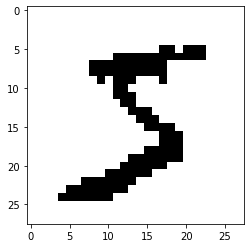

In [29]:
# one example of a binary image of the number '5'
plt.imshow(np.array(mnistBin.iloc[0]).reshape(28, 28), cmap=plt.cm.Greys)

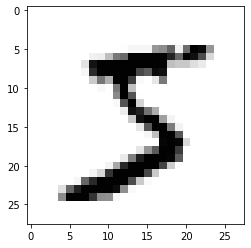

In [30]:
plt.imshow(np.array(mnist.data.iloc[0]).reshape(28, 28), cmap=plt.cm.Greys)

In [71]:
# PMF for bernoulli distribution applied on a data matrix
# Result represents p(x | mean)
# data is the data matrix, thetas are cluster 
# returns a probability matrix of size len(data) * len(thetas)
def bernoulliPDF(data, thetas):
    res = np.zeros((len(data), len(thetas)))
    for i in range(len(data)):
        for j in range(len(thetas)):
            # p(x) = t^x * (1-t)^(n-x)
            res[i, j] = np.prod(thetas[j] ** data[i] * ((1-thetas[j]) ** (1-data[i])))
    return res

Then calculate responsibility matrix for each cluster and data point

In [86]:
# calculate responsibilities of each data point to all given clusters
def respMatrix(data, weights, thetas):
    numerator = bernoulliPDF(data, thetas) * weights
    denom = np.sum(numerator, axis=1)[:, np.newaxis]
    
    if np.any(denom == 0):
        print('zero division in respMatrix')
    return numerator / denom
    

In [74]:
# update weights fixing responsibility by maximizing expectation of log likelihood
def mStep(data, resp):
    N, D, K = len(data), len(data[0]), len(resp[0])
    
    Nk = np.sum(resp, axis=0) # bishop equation 9.57
    res = np.empty((K, D)) # thetas (mu_k)
    
    # bishop equation 9.59 for updating weights (mixing coeffs) and thetas
    for k in range(K):
        res[k] = np.sum(resp[:, k][:, np.newaxis] * data, axis =0)
        if Nk[k] != 0:
            res[k] /= Nk[k]
        else:
            print("Divide by zero in mStep")
    return (Nk / len(data), res)

In [169]:
# expectation for complete log likelihood (bishop eq)

def logLikelihood(data, weights, thetas):
    resp = respMatrix(data, weights, thetas)
    
    N, K = len(data), len(thetas)
    ll = 0
    
    for n in range(N):
        s = 0
        for k in range(K):
            px = ((thetas[k]**data[n]) * (1-thetas[k])**(1-data[n]))
            px = np.log(px.clip(min=1e-50))
            s += resp[n, k] * (np.log(weights[k]) + sum(px))
        ll += s
    return (ll, resp)

In [212]:
def EM(data, weights, thetas):
    N, D, K = len(data), len(data[0]), len(thetas)
    
    currentWeight = weights.copy()
    currentTheta = thetas.copy()
    
    ll, resp = logLikelihood(data, currentWeight, currentTheta)
    last_ll = ll
    
    for i in range(1000):
        if i % 100 == 0:
            print('iter:', i+1)
            print('log likelihood:', ll)
        
        currentWeight, currentTheta = mStep(data, resp)
        
        ll, resp = logLikelihood(data, currentWeight, currentTheta)
        if abs(ll - last_ll) < 1e-10:
            break
        else:
            ll_curve.append(ll)
            last_ll = ll
            
    return (currentWeight, currentTheta, resp)
        

In [269]:
def getSubset(nums, n_samples = 3000):
    data, label = shuffle(mnistBin, mnist.target, n_samples = 3000)
    data = data.to_numpy()
    label = label.to_numpy()
    subsetLabel = []
    subsetData = []
    
    for i in range(len(data)):
        if label[i] in nums:
            subsetLabel.append(label[i])
            subsetData.append(data[i])
    
    return (subsetData, subsetLabel)

In [270]:
def run(data, K):
    D = len(data[0])
    
    weights = np.random.uniform(0.25, 0.75, K)
    weights /= np.linalg.norm(weights)
    
    thetas = np.zeros((K, D))
    thetas.fill(1.0 / K)
    
    ll_curve = []
    
    bestWeight, bestTheta, resp = EM(data, weights, thetas)
    return (bestWeight, bestTheta, resp, ll_curve)

In [301]:
def MOB_accuracy(label, clusters, resp):
    correct = 0
    
    for i in range(len(resp)):
        predicted = clusters[np.argmax(resp[i])]
        expected = label[i]
        if predicted == expected:
            correct += 1
    return correct / len(resp)

In [298]:
from sklearn.utils import shuffle


data, label = shuffle(mnistBin, mnist.target, n_samples = 10000)
data = data.to_numpy()
label = label.to_numpy()
subsetLabel = []
subsetData = []
s = set(['2', '3', '4'])
for i in range(len(data)):
    if label[i] in s:
        subsetLabel.append(label[i])
        subsetData.append(data[i])

K = 3 # number of clusters
D = len(subsetData[0]) # number of pixels

# follow bishop method, initialize weights as uniform random variables (0.25, 0.75) then normalize
initWeights = np.random.uniform(0.25,0.75,K)
initWeights = initWeights/ np.linalg.norm(initWeights)
# initialize mixing coeffs as 1.0 / k for all means
initThetas = np.full((K, D), 1.0/K)

ll_curve = []

bestWeight, bestTheta, resp = EM(subsetData, initWeights, initThetas)

iter: 1
log likelihood: -1194534.586418023


Text(0, 0.5, 'log likelihood')

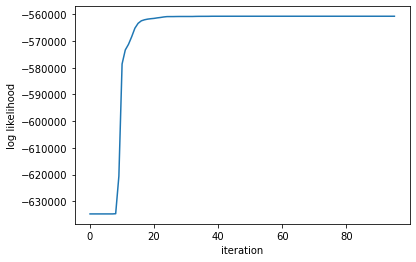

In [299]:
plt.plot(list(range(len(ll_curve))),ll_curve)
plt.xlabel("iteration")
plt.ylabel("log likelihood")

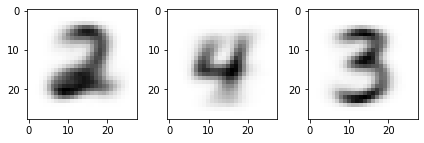

In [300]:
f, a = plt.subplots(1, 3)
for idx, i in enumerate(a.flatten()):
    i.imshow(bestTheta[idx].reshape((28, 28)), cmap=plt.cm.Greys)
plt.tight_layout()

In [302]:
cluster_labels = ['2', '4', '3']

MOB_accuracy(subsetLabel, cluster_labels, resp)

0.9062706270627062

In [306]:
data, label = shuffle(mnistBin, mnist.target, n_samples = 5000)
data = data.to_numpy()
label = label.to_numpy()
subsetLabel = []
subsetData = []
s = set(['1', '2', '3', '4', '5'])
for i in range(len(data)):
    if label[i] in s:
        subsetLabel.append(label[i])
        subsetData.append(data[i])

K = 5 # number of clusters
D = len(subsetData[0]) # number of pixels

# follow bishop method, initialize weights as uniform random variables (0.25, 0.75) then normalize
initWeights = np.random.uniform(0.25,0.75,K)
initWeights = initWeights/ np.linalg.norm(initWeights)
# initialize mixing coeffs as 1.0 / k for all means
initThetas = np.full((K, D), 1.0/K)

ll_curve = []

bestWeight, bestTheta, resp = EM(subsetData, initWeights, initThetas)

iter: 1
log likelihood: -774166.4455370876
iter: 101
log likelihood: -412383.8414824898
iter: 201
log likelihood: -412376.07558193535


Text(0, 0.5, 'log likelihood')

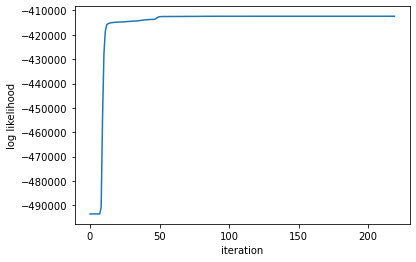

In [307]:
plt.plot(list(range(len(ll_curve))),ll_curve)
plt.xlabel("iteration")
plt.ylabel("log likelihood")

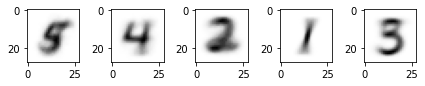

In [309]:
f, a = plt.subplots(1, 5)
for idx, i in enumerate(a.flatten()):
    i.imshow(bestTheta[idx].reshape((28, 28)), cmap=plt.cm.Greys)
plt.tight_layout()

In [310]:
cluster_labels = ['5', '4', '2', '1', '3']

MOB_accuracy(subsetLabel, cluster_labels, resp)

0.7366304784881383